# QBIO577 Fall 2022 
## Welcome to Julia
 - https://julialang.org/
 - Examples in this notebook from [here](https://deepnote.com/workspace/personal-workspace-b543-b8cd-a37ceb09-5911-4c9f-a966-7236a4025f55/project/intro-julia-jupyter-105b09d5-f3cd-4139-afe2-1e3a35de4963/%2Fintro-julia-jupyter.ipynb) 
 

## Installing IJulia and loading this notebook
Once Julia is installed, start julia and just run the following command to install the `IJulia` package
```jl
Pkg.install("IJulia")/
```
This should work on its own. If there is any issue, check out the [IJulia website](https://github.com/JuliaLang/IJulia.jl).

Once IJulia is installed, go to the notebook file (_.ipynb_) directory, start julia and run:
```jl
using IJulia
notebook()
```
A webpage should open automatically, just click on the notebook to load it.

## Coding in Julia
This section is a brief introduction to Julia. It is not a comprehensive tutorial but more a _taste_ of the language for those who do not know it, and a showcase of cool features for those who already know Julia.

Very good [tutorials](http://julialang.org/learning/) are available online and in books if you are interested in learning the language.

In [ ]:
1+2

In [ ]:
sin(exp(2*pi))

In [ ]:
a = 1
b = 2

# This is a comment 
c = a^2 + b^3 

In [ ]:
function countTo(n)
    count = 0
    for i = 1:n
        count += 1
    end
    return count
end

println("First use: slow (compiles as a dynamical language)")
@time countTo(1e9)
println("Second use: compiled and optimized automatically")
@time countTo(1e9);


In [ ]:
c

### loops work as you'd expect...

In [ ]:
if c >= 10
    print("QCB")
else
    print("CBB")
end 

In [ ]:
i = 1
while i <= 5
    println("QCB!") # Print with a new line
    i += 1
end


In [ ]:
# Use '$' to insert variables into text
for i = 1:3
    print("$i Student") 
    if i>1
        print("s")
    end
    println()
end


**NB: Do not worry about writing loops**: in Julia, they are often as fast as writing vectorized code, and sometimes faster!

**Arrays** (list of numbers) are at the core of research computing and Julia's arrays are extremely optimized.

In [1]:
v = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [2]:
v[1]

1

In [3]:
v[3] = 4
v

3-element Vector{Int64}:
 1
 2
 4

In [4]:
## These are equivalent 
A = [1 2 3
     2 1 2
     3 2 1]

## or
A = [1 2 3; 2 1 2; 3 2 1]


3×3 Matrix{Int64}:
 1  2  3
 2  1  2
 3  2  1

In [5]:
## Inverse
A^-1 


3×3 Matrix{Float64}:
 -0.375   0.5   0.125
  0.5    -1.0   0.5
  0.125   0.5  -0.375

In [6]:
A^2

3×3 Matrix{Int64}:
 14  10  10
 10   9  10
 10  10  14

In [7]:
A^2*A^-1

3×3 Matrix{Float64}:
 1.0  2.0  3.0
 2.0  1.0  2.0
 3.0  2.0  1.0

In [8]:
A*[1,2,3]

3-element Vector{Int64}:
 14
 10
 10

In [9]:
# Solve Ax = b
b = [1,1,1]
A\b


3-element Vector{Float64}:
 0.25
 0.0
 0.25000000000000006

In [10]:
evalues  = eigen(A)


LoadError: UndefVarError: eigen not defined

### Aha! We need a linear algebra package...

In [ ]:
## Run:
#using Pkg
#Pkg.add("LinearAlgebra")

## or use ']' in the REPL
## followed by: add LinearAlgebra

In [12]:
using LinearAlgebra

evalues, evectors = LinearAlgebra.eigen(A)
evalues


3-element Vector{Float64}:
 -2.0
 -0.7015621187164252
  5.701562118716413

### Math and other things look nice in Julia...


In [13]:
using Symbolics 
@variables x y z

3-element Vector{Num}:
 x
 y
 z

In [14]:
@variables x₁ x₂ x₃ 
x = [x₁ x₂ x₃]


1×3 Matrix{Num}:
 x₁  x₂  x₃

In [15]:
@variables α β γ 

y = α*z + β

β + z*α

In [17]:
using ModelingToolkit

@variables x y z t
@parameters σ ρ β
D = Differential(t)

# Defines the Lorenz system
eqs = [D(x) ~ σ*(y-x),
       D(y) ~ x*(ρ-z)-y,
       D(z) ~ x*y - β*z]


3-element Vector{Equation}:
 Differential(t)(x) ~ σ*(y - x)
 Differential(t)(y) ~ x*(ρ - z) - y
 Differential(t)(z) ~ x*y - z*β

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


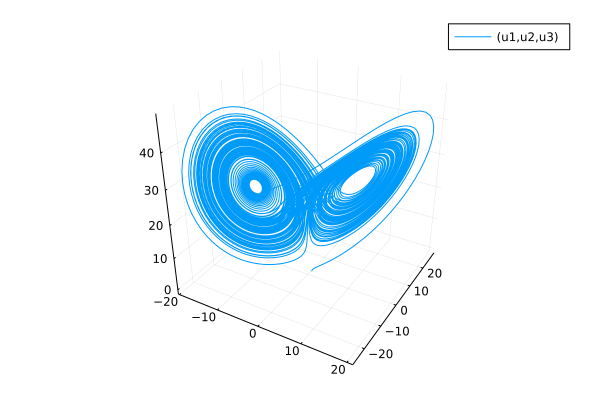

In [18]:

using DifferentialEquations 

function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob)

using Plots 
plot(sol,vars=(1,2,3))


In [19]:
## Last but not least... emoji!
🐟 = 1.5
🐈 = 5

🐈 - 🐟 

3.5

In [20]:
π*🐟 

4.71238898038469

**Types:** Everything has a type in Julia

In [21]:
typeof(4)

Int64

In [22]:
typeof(1.5) 

Float64

In [23]:
typeof("abc") 

String

Types are at the core of Julia's performance. **[multiple dispatch](https://en.wikipedia.org/wiki/Multiple_dispatch)** is used dynamically when a function is called, selecting the right version of the function depending on the type of its argument.

In [24]:
1//2 # fraction in Julia

1//2

In [25]:
typeof(1//2)

Rational{Int64}

In [26]:
(1//2)^2

1//4

In [27]:
(0.5)^2 

0.25

 ^^The same function gives different results depending on the type

Use `?` to get the documentation of a function

In [28]:
?eigen

search: eigen eigen! Eigen IncrementingODEFunction GeneralizedEigen



```
eigen(A; permute::Bool=true, scale::Bool=true, sortby) -> Eigen
```

Compute the eigenvalue decomposition of `A`, returning an [`Eigen`](@ref) factorization object `F` which contains the eigenvalues in `F.values` and the eigenvectors in the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

The following functions are available for `Eigen` objects: [`inv`](@ref), [`det`](@ref), and [`isposdef`](@ref).

For general nonsymmetric matrices it is possible to specify how the matrix is balanced before the eigenvector calculation. The option `permute=true` permutes the matrix to become closer to upper triangular, and `scale=true` scales the matrix by its diagonal elements to make rows and columns more equal in norm. The default is `true` for both options.

By default, the eigenvalues and vectors are sorted lexicographically by `(real(λ),imag(λ))`. A different comparison function `by(λ)` can be passed to `sortby`, or you can pass `sortby=nothing` to leave the eigenvalues in an arbitrary order.   Some special matrix types (e.g. [`Diagonal`](@ref) or [`SymTridiagonal`](@ref)) may implement their own sorting convention and not accept a `sortby` keyword.

# Examples

```jldoctest
julia> F = eigen([1.0 0.0 0.0; 0.0 3.0 0.0; 0.0 0.0 18.0])
Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
  1.0
  3.0
 18.0
vectors:
3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

julia> F.values
3-element Vector{Float64}:
  1.0
  3.0
 18.0

julia> F.vectors
3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

julia> vals, vecs = F; # destructuring via iteration

julia> vals == F.values && vecs == F.vectors
true
```

---

```
eigen(A, B; sortby) -> GeneralizedEigen
```

Compute the generalized eigenvalue decomposition of `A` and `B`, returning a [`GeneralizedEigen`](@ref) factorization object `F` which contains the generalized eigenvalues in `F.values` and the generalized eigenvectors in the columns of the matrix `F.vectors`. (The `k`th generalized eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

By default, the eigenvalues and vectors are sorted lexicographically by `(real(λ),imag(λ))`. A different comparison function `by(λ)` can be passed to `sortby`, or you can pass `sortby=nothing` to leave the eigenvalues in an arbitrary order.

# Examples

```jldoctest
julia> A = [1 0; 0 -1]
2×2 Matrix{Int64}:
 1   0
 0  -1

julia> B = [0 1; 1 0]
2×2 Matrix{Int64}:
 0  1
 1  0

julia> F = eigen(A, B);

julia> F.values
2-element Vector{ComplexF64}:
 0.0 - 1.0im
 0.0 + 1.0im

julia> F.vectors
2×2 Matrix{ComplexF64}:
  0.0+1.0im   0.0-1.0im
 -1.0+0.0im  -1.0-0.0im

julia> vals, vecs = F; # destructuring via iteration

julia> vals == F.values && vecs == F.vectors
true
```

---

```
eigen(A::Union{SymTridiagonal, Hermitian, Symmetric}, irange::UnitRange) -> Eigen
```

Compute the eigenvalue decomposition of `A`, returning an [`Eigen`](@ref) factorization object `F` which contains the eigenvalues in `F.values` and the eigenvectors in the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

The following functions are available for `Eigen` objects: [`inv`](@ref), [`det`](@ref), and [`isposdef`](@ref).

The [`UnitRange`](@ref) `irange` specifies indices of the sorted eigenvalues to search for.

!!! note
    If `irange` is not `1:n`, where `n` is the dimension of `A`, then the returned factorization will be a *truncated* factorization.


---

```
eigen(A::Union{SymTridiagonal, Hermitian, Symmetric}, vl::Real, vu::Real) -> Eigen
```

Compute the eigenvalue decomposition of `A`, returning an [`Eigen`](@ref) factorization object `F` which contains the eigenvalues in `F.values` and the eigenvectors in the columns of the matrix `F.vectors`. (The `k`th eigenvector can be obtained from the slice `F.vectors[:, k]`.)

Iterating the decomposition produces the components `F.values` and `F.vectors`.

The following functions are available for `Eigen` objects: [`inv`](@ref), [`det`](@ref), and [`isposdef`](@ref).

`vl` is the lower bound of the window of eigenvalues to search for, and `vu` is the upper bound.

!!! note
    If [`vl`, `vu`] does not contain all eigenvalues of `A`, then the returned factorization will be a *truncated* factorization.



## Happy exploring... 😎